<a href="https://colab.research.google.com/github/soustan/Statistic-Analisis/blob/main/%22%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%A1%D1%83%D1%85%D0%BE%D1%80%D1%83%D0%BA%D0%BE%D0%B2_%D0%A1%D1%82%D0%B0%D0%BD%D0%B8%D1%81%D0%BB%D0%B0%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Осуществляем загрузку DataSet и DataFrame.

In [40]:
! gdown 1DIOotGM2fIoLaF54B2Q8cOrNMepyLGI8

Downloading...
From: https://drive.google.com/uc?id=1DIOotGM2fIoLaF54B2Q8cOrNMepyLGI8
To: /content/region_roles_26_05_22.xlsx
100% 84.4M/84.4M [00:00<00:00, 244MB/s]


Осуществляем импорт библиотеки Pandas и низкоуровневой структуры (тип данных) и модулей и включённые в эти модули объекты. 
А именно: 
NumPy, 
pandas, 
matplotlib.pyplot, 
scipy, 
seaborn, 
statsmodels.api, 
sklearn.linear_model.

In [41]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.api as smf
import statsmodels.api as stats

In [42]:
reg_rol = pd.read_excel('region_roles_26_05_22.xlsx')

In [43]:
reg_rol['salary_js'] = reg_rol['salary'].fillna('{}').apply(eval)

def get_values_from(json):
    try:
        return json['from']
    except:
        return None

def get_currency(json):
    try:
        return json['currency']
    except:
        return None

def get_gross(json):
    try:
        return json['gross']
    except:
        return None

reg_rol['salary_from'] = reg_rol['salary_js'].apply(get_values_from)
reg_rol['salary_currency'] = reg_rol['salary_js'].apply(get_currency)
reg_rol['salary_gross'] = reg_rol['salary_js'].apply(get_gross)

for a in range(len(reg_rol['salary_currency'])):
    if reg_rol['salary_currency'][a] == 'USD': 
        reg_rol['salary_from'][a] *= 60.97
        reg_rol['salary_currency'][a] = 'RUR'
    elif reg_rol['salary_currency'][a] == 'EUR':
        reg_rol['salary_from'][a] *= 60.82
        reg_rol['salary_currency'][a] = 'RUR'
    elif reg_rol['salary_currency'][a] == 'KZT':
        reg_rol['salary_from'][a] *= 13.13
        reg_rol['salary_currency'][a] = 'RUR'
    a += 1  

for b in range(len(reg_rol['salary_gross'])):
    if reg_rol['salary_gross'][b] == 'True':
        reg_rol['salary_from'][b] *= 0.87
    b += 1
filter_mrot_from = (reg_rol['salary_from'] > 13890)
reg_rol = reg_rol[filter_mrot_from]
reg_rol['salary_from'] = reg_rol['salary_from'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to b

In [44]:
def get_values_name(json):
    try:
        return json['name']
    except:
        return None

reg_rol['experience_js'] = reg_rol['experience'].fillna('{}').apply(eval)
reg_rol['experience_nm'] = reg_rol['experience_js'].apply(get_values_name)
reg_rol['schedule_js'] = reg_rol['schedule'].fillna('{}').apply(eval)
reg_rol['schedule_nm'] = reg_rol['schedule_js'].apply(get_values_name)

In [45]:
reg_rol_new = reg_rol[['name', 'salary_from', 'region', 'experience_nm', 'schedule_nm']]

В качестве описания указываем типы данных при формировании нового DataSet - reg_rol_new:

salary_from (нижний уровень зарплаты) - количественный тип ;
name (наименование вакансии) - категориальный тип ;
region (регион, в коором размещена вакансия) - категориальный тип ;
schedule_nm (график работы) - категориальный тип ;
experience_nm (требуемый опыт работы) - категориальный тип (который в данном случае имеется возможность привести к порядковому типу данных)
(Источник данных взят отсюда ---> https://habr.com/ru/post/527860/ ) ;

Теперь стоит отобразить полученные в результате данные:

In [46]:
reg_rol_new['salary_from'].describe().apply(lambda x: format(x, 'f'))

count      33658.000000
mean       79200.305336
std        74747.595484
min        13900.000000
25%        40000.000000
50%        60000.000000
75%       100000.000000
max      5252000.000000
Name: salary_from, dtype: object

Далее, переходим к анализу зарплат. Для этого создадим boxplot ("ящик с усами") при распределении уровня зарплат. Необходимость данного шага, обусловлена потребностями получения показателей: медианы(50%) и соответственно квартилей (25% и 75 %). А так же необходимостью определить, какими будут границы выбросов.

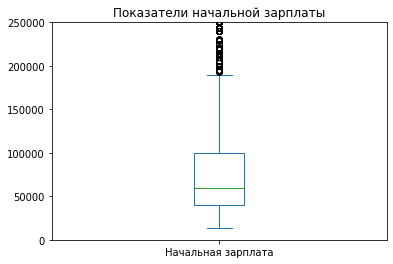

In [47]:
cx = reg_rol_new['salary_from'].plot.box()
cx.set_xticklabels(['Начальная зарплата'])
plt.title('Показатели начальной зарплаты', fontsize=12)
plt.axis(ymin=0, ymax=250000)
plt.show()

Как видно на графике boxplot столбца минимальной зарплаты указывает нам, что характерные показатели столбца расположены в значениях до 200000 рублей. При этом, 75 % от всего количества вакансий включают начальную зарплату до 100000 рублей. 
На основании полученной информации и данных, будем строить гистограмму распределения зарплат по интервалам.

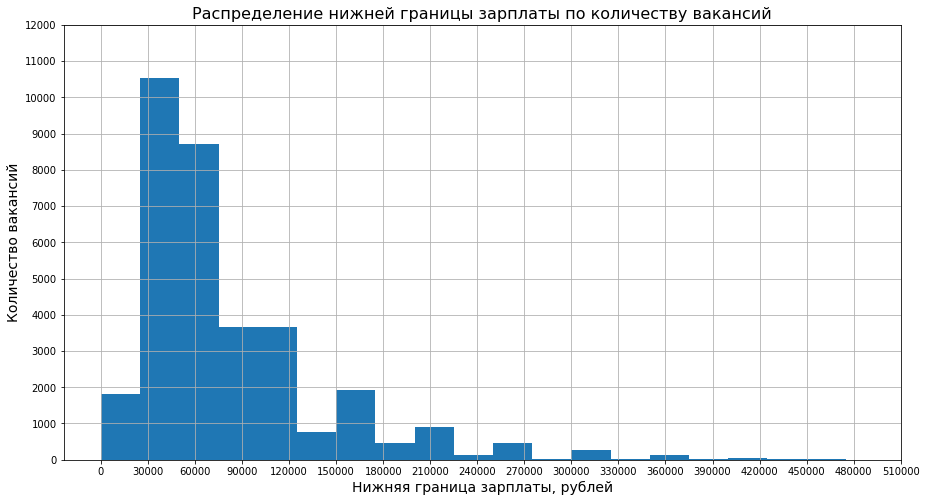

In [48]:
reg_rol_new['salary_from'].plot(kind="hist", bins=[bin for bin in range(0, 500000, 25000)], 
                           figsize=(15, 8), 
                           xticks = [tick for tick in range(0, 530000, 30000)],
                           yticks = [tick for tick in range(0, 13000, 1000)],
                           grid=True)
plt.title("Распределение нижней границы зарплаты по количеству вакансий", fontsize = 16)
plt.ylabel('Количество вакансий', fontsize = 14)
plt.xlabel('Нижняя граница зарплаты, рублей', fontsize = 14)
plt.show()

Отображаемые гистограмме данные отчётливо свидетельствуют нам о том, что основное количество вакансий (ориентировочно 10500) могут предложить начальный уровень зарплаты в диапазоне от 25000 до 48000 рублей. Не существенно, но меньшее количество вакансий (в районе 8800) предлагают уровень зарплат в диапазоне от 48000 до 73000 рублей. Далее видно, что ориентировочно по 3800 вакансий, каждая, предлагают уровни зарплат, в диапазоне от 73000 до 100000 и от 100000 до 130000 рублей, соответственно. Число вакансий с более высокими уровнями начальной зарплаты резко падает, начиная с показателей 150000 рублей (менее 2000 вакансий). И от уровня зарплаты 180000 рублей, не превышая границу 1000 вакансий.

В дальнейшем, необходимо проанализировать вакансии по их числу в регионах. Для этого, используем столбчатую диаграмму.

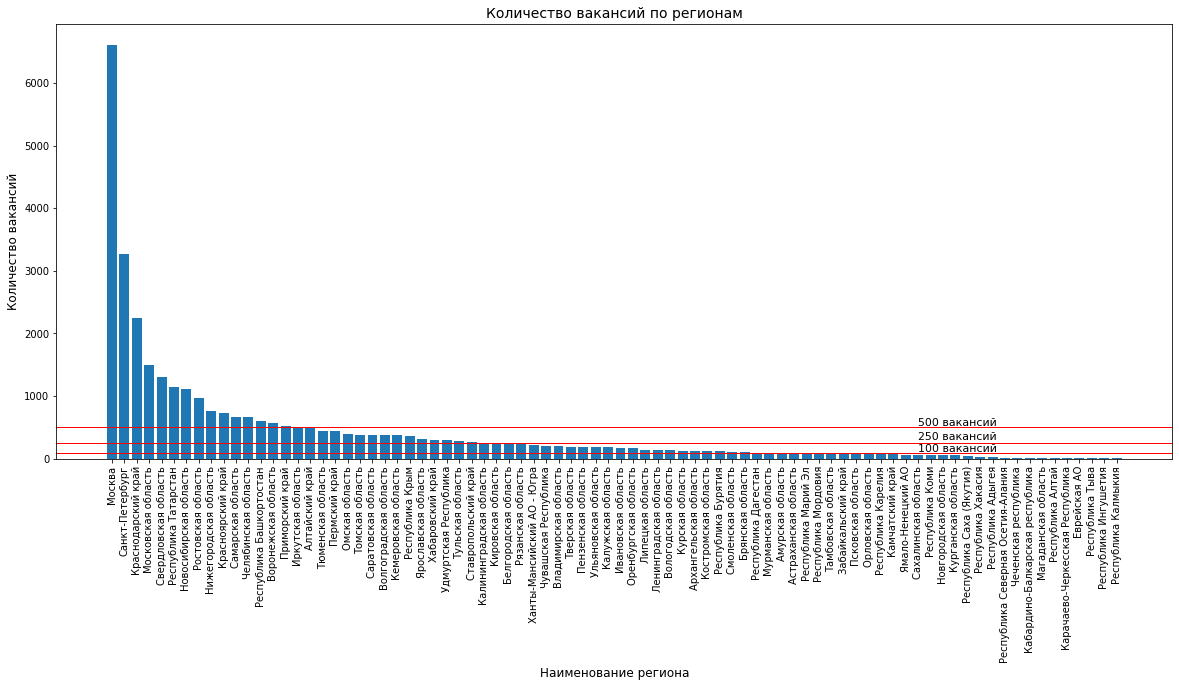

In [49]:
region_vac_count = reg_rol_new['region'].value_counts()
figure = plt.figure(figsize=(20, 8))
plt.bar(region_vac_count.index, region_vac_count)
 
plt.title(label="Количество вакансий по регионам", fontsize=14)
plt.ylabel("Количество вакансий", fontsize=12)
plt.xlabel("Наименование региона", size=12)
plt.xticks(fontsize=10, rotation=90) # поворот подписи на 90 градусов

plt.axhline(y=100, color='red', linewidth=1)
plt.text(x=65, y=110, s='100 вакансий', size=11, color='black')
plt.axhline(y=250, color='red', linewidth=1)
plt.text(x=65, y=300, s='250 вакансий', size=11, color='black')
plt.axhline(y=500, color='red', linewidth=1)
plt.text(x=65, y=520, s='500 вакансий', size=11, color='black')

plt.show()

Графики столбчатой диаграммы демонстрируют нам, что число регионов с числом вакансий 500 и более равно 17. 17 регионов, предлагают вакансии в количестве 250 и более, но не более 500. Оставшиеся 48 регионов, предлагают количество вакансий более 100, но не более 250. При этом, максимаьное количество вакансий - 6846 в г.Москва, а минимальное значение - 4, в республике Калмыкия.

Переходим к отображению количества вакансий с учётом стажа работы отображаемые на круговой диаграмме.

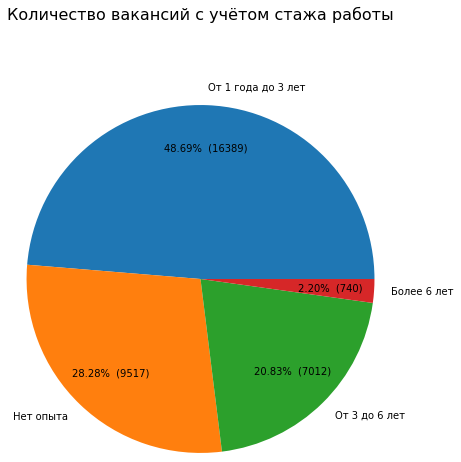

In [50]:
experience_count = reg_rol_new['experience_nm'].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(experience_count, labels=experience_count.index, autopct=make_autopct(experience_count),
        radius=2, pctdistance=0.75)
plt.title(label="Количество вакансий с учётом стажа работы", fontsize=16, pad=150)
plt.show()

Далее, отображаем количество вакансий относительно рабочего времени и занятости работника.

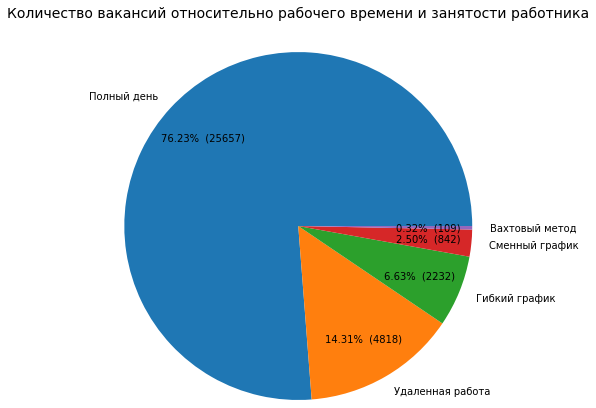

In [51]:
schedule_count = reg_rol_new['schedule_nm'].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(schedule_count, labels=schedule_count.index, autopct=make_autopct(schedule_count),
        radius=2, pctdistance=0.75)
plt.title(label="Количество вакансий относительно рабочего времени и занятости работника", fontsize=14, pad=100)
plt.show()

- На диаграмме "Количество вакансий с учётом стажа работы", отчётливо 
видно, что практически половина(50%) вакансий - это предложения, для специалистов, с "опытом работы от 1-го года до 3-х лет". Вторую строку, примерно треть(29%) от общего числа вакансий, занимают предложения "без опыта работы". 
- На диаграмме "Количество вакансий относительно рабочего времени и занятости работника", с большим преимуществом (более 76% вакансий), лидируют вакансии, у которых "Полным рабочий день". Следующий показатель(менее 15%), занимает позиция "Удалённая работа". Остальные варианты организации труда работников - "Вахтовый метод", "Гибкий график" и "Сменный график", суммарно занимают менее 10%, от общего объёма вакансий.

Далее переходим, к следующему пункту: "Проверка гипотезы о виде распределения". Данный метод, основан на существовании "Нормального закона распределения", по другому называемый как "закон Гаусса". (Источник информации здесь --> https://habr.com/ru/company/otus/blog/671322 ). В нашем случае будет проверяться нижнее значение зарплаты. Который представляет собой - количественный фактор. В этой связи, необходимо отметить, что количество значений в выборке существенно болеше 5000. А именно 33658. То, в таком случае, критерий Шапиро-Уилка (это тест на нормальность в частотной статистике), в данном случае не актуален. И потому, проверка будет осуществлена на основе теста Д’Агостино и критериев асимметрии и эксцесса.

Выборочный коэффициент асиметрии:

In [52]:
reg_rol_new[['salary_from']].skew()

salary_from    14.139206
dtype: float64

Выборочный эксцесс:

In [53]:
reg_rol_new[['salary_from']].kurtosis()

salary_from    752.863087
dtype: float64

Как видно из вычислений, "Критерий асимметрии" показал значение 14.13, в то время как у нормально распределённой выборки он составляет 0 +/-1. Таким образом фиксируем, что у данной выборки гораздо более пологий правый хвост распределения. Критерий эксцесса показал значение 752.86!!! При этом, в варианте нормального распределения, данная величина составляет 3. Таким образом, в результате полученное значение показывает, что график распределения слишком острый.

In [54]:
scipy.stats.normaltest(reg_rol_new['salary_from'])

NormaltestResult(statistic=64438.61297932771, pvalue=0.0)

Тест Д’Агостино свидетельствует, что значение p-value = 0.0. Таким образом, данное значение, меньше минимального значения уровня значимости, равное 0.05. 
На основании этого, делаем вывод: нулевая гипотеза отклоняется. 
А так же фиксируем тот факт, что распределение выборки нижнего порога зарплаты ненормально.

Далее переходим к оценка связи между показателями. 
- Сравним количественный показатель, которым является зарплата, с одним из категориальных факторов, котоым является стаж работы.

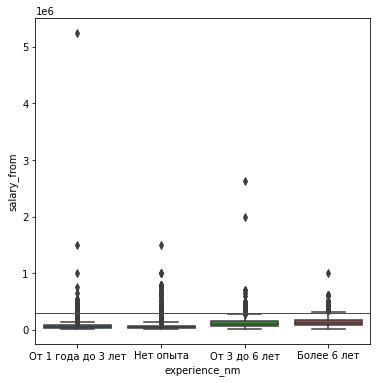

In [55]:
pf, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience_nm', y='salary_from', data=reg_rol_new)
plt.axhline(y=300000, color='red', linewidth=1)

Как видно на графике, что при сравнении показателей стажа работы и зарплат имеется существенная область выбросов. Необходимо отфильтровать данную область.

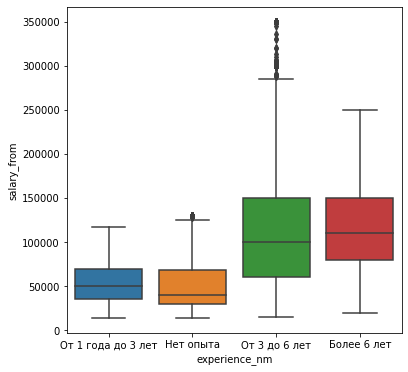

In [56]:
reg_rol_flt = reg_rol_new.drop(reg_rol_new.loc[(reg_rol_new['experience_nm'] == 'От 3 до 6 лет') & (reg_rol['salary_from'] > 350000)].index)
reg_rol_flt = reg_rol_flt.drop(reg_rol_new.loc[(reg_rol_new['experience_nm'] == 'От 1 года до 3 лет') & (reg_rol['salary_from'] > 118000)].index)
reg_rol_flt = reg_rol_flt.drop(reg_rol_new.loc[(reg_rol_new['experience_nm'] == 'Нет опыта') & (reg_rol['salary_from'] > 130000)].index)
reg_rol_flt = reg_rol_flt.drop(reg_rol_new.loc[(reg_rol_new['experience_nm'] == 'Более 6 лет') & (reg_rol['salary_from'] > 255000)].index)
pf, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience_nm', y='salary_from', data=reg_rol_flt)
plt.show()

Отображаемый на графике данные, свидетельствуют о том, что если взять конкретный показатель стажа работы - "Более 6 лет", ограничивая его уровнем зарплаты в 500000 рублей. А в этом момент, boxplot выборки покажет границу характерных данных в районе 250000 рублей. Этот показатель расположен ниже, чем граница характерных данных выборки "От 3 до 6 лет" - около 280000 руб. Со снижением границы будет снижаться и граница характерных данных. Для выборки "От 1 года до 3 лет" эта граница равна 120000, для выборки "Нет опыта" - 130000 рублей. На границе уровня зарплаты в 400000 рублей для всех типов опыта, у выборок "От 1 года до 3 лет" и "Нет опыта" верхняя граница характерных данных лежит в районе 140000 рублей. У позиции "Нет опыта" - 130000. Стаж работы "От 3 до 6 лет" - так же 280000 руб., у выборки "Более 6 лет" - в районе 250000 рублей.

Ввиду того, что в данном случае сравнению подлежат количественные и категориальные данные. При этом количественные данные распределены ненормально. В то время как у категориальных данных, представлено 4 группы данных. Вместе с тем, оба критерия не являются зависимыми. 
То, на основании описанного, для оценки наличия взаимосвязи между ними имеется возможность использовать критерий Краскела-Уоллиса(Источник здесь ---> https://www.codecamp.ru/blog/kruskal-wallis-test-python ).

In [57]:
c1_exp = np.array(reg_rol_flt[reg_rol_flt['experience_nm'] == 'Нет опыта']['salary_from'])
c2_exp = np.array(reg_rol_flt[reg_rol_flt['experience_nm'] == 'От 1 года до 3 лет']['salary_from'])
c3_exp = np.array(reg_rol_flt[reg_rol_flt['experience_nm'] == 'От 3 до 6 лет']['salary_from'])
c4_exp = np.array(reg_rol_flt[reg_rol_flt['experience_nm'] == 'Более 6 лет']['salary_from'])
scipy.stats.mstats.kruskalwallis(c1_exp, c2_exp, c3_exp, c4_exp)

KruskalResult(statistic=7052.4962847117595, pvalue=0.0)

Для выборок опыта с границей в 400000 рублей для всех значение статистики по критерию Краскала-Уолиса = 5642.7, p-value = 0.0. При индивидуальных границах выборок значение статистического анализа равно 7052.49, p-value по-прежнему 0.0. Это значит, что связь между признаками есть и она ярко выраженная.

Переходим к следующему разделу.
Анализ таблиц сопряжённости.

В таблице сопряжённости будут сравниваться два категориальных фактора: "Стаж работы" и "Регион". Для чего необходимо ограничить список регионов теми, у которых число вакансий более 500.

In [58]:
reg_rol_flt_reg = reg_rol_new[reg_rol_new['region'].map(reg_rol_new['region'].value_counts()) >= 500]
reg_rol_flt_reg

,name,salary_from,region,experience_nm,schedule_nm
1183,Middle/Senior QA Automation Engineer (Remote),91455,Нижегородская область,От 3 до 6 лет,Удаленная работа
1188,Тестировщик ПО,50000,Нижегородская область,От 1 года до 3 лет,Удаленная работа
1193,Тестировщик программного обеспечения/QA Egineer,50000,Нижегородская область,От 1 года до 3 лет,Полный день
1202,Middle QA auto тестировщики (удаленно),180000,Нижегородская область,От 3 до 6 лет,Полный день
1203,QA Инженер по нагрузочному тестированию,100000,Нижегородская область,От 1 года до 3 лет,Удаленная работа
...,...,...,...,...,...
67890,Frontend-разработчик,30000,Челябинская область,Нет опыта,Полный день
67891,"Back-end разработчик (Node.js, TS, ES6-19, .Ne...",60000,Челябинская область,От 1 года до 3 лет,Полный день
67892,"Front-end разработчик (JS, Vue.js, Nuxt.js)",40000,Челябинская область,От 1 года до 3 лет,Полный день
67893,Ведущий специалист информационной поддержки по...,55000,Челябинская область,От 1 года до 3 лет,Полный день


In [59]:
reg_rol_flt_reg_vc = reg_rol_flt_reg.groupby('region')['experience_nm'].value_counts()
reg_rol_fr_vc_sum = reg_rol_flt_reg_vc.groupby('region').sum()
reg_rol_fr_vc_sum = reg_rol_fr_vc_sum.sort_values(ascending=False)
zn = pd.crosstab(reg_rol_flt_reg['experience_nm'], reg_rol_flt_reg['region'])
sorted_zn = zn[zn.sum().sort_values(ascending=False).index]
sorted_zn

region,Москва,Санкт-Петербург,Краснодарский край,Московская область,Свердловская область,Республика Татарстан,Новосибирская область,Ростовская область,Нижегородская область,Красноярский край,Самарская область,Челябинская область,Республика Башкортостан,Воронежская область,Приморский край
experience_nm,,,,,,,,,,,,,,,
Более 6 лет,252,93,25,12,31,18,31,4,19,25,11,12,10,6,4
Нет опыта,938,535,1117,591,323,296,226,349,166,203,174,198,202,180,174
От 1 года до 3 лет,3326,1760,861,628,661,616,574,449,424,348,360,336,301,289,263
От 3 до 6 лет,2094,873,250,261,294,220,290,170,159,149,129,114,88,93,86


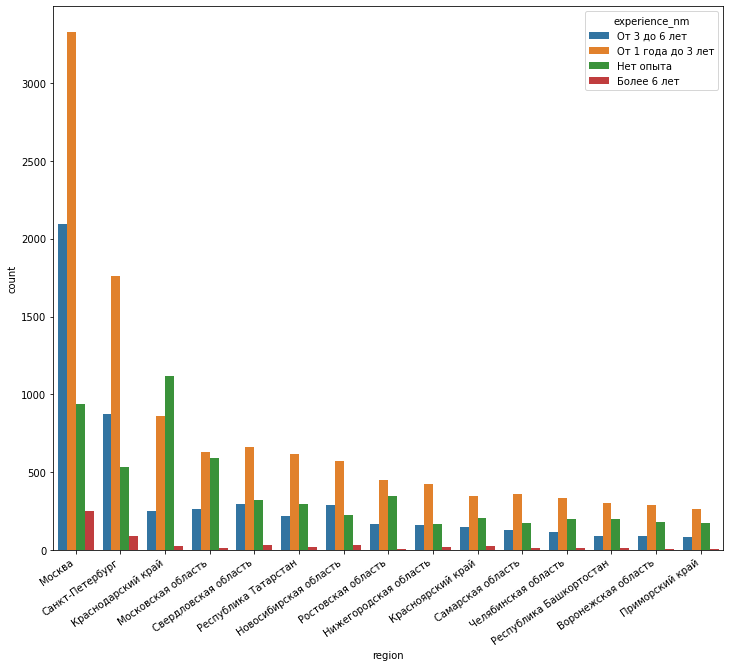

In [60]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x=reg_rol_flt_reg['region'], hue=reg_rol_flt_reg['experience_nm'], 
                   order=reg_rol_flt_reg['region'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
plt.show()

In [61]:
chi2, prob, reg_rol, expected = scipy.stats.chi2_contingency(zn)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, reg_rol, prob))

test Statistics: 1888.2877748960861
degrees of freedom: 42
p-value: 0.0



Таблица сопряжённости и её график для 14-ти регионов по числу вакансий показали, что на ряду с ростом числа вакансий растут и показатели по каждой отдельной категории стажа работы. Равномено распределён и имеется рост числа вакансий у столбца "От 1 года до 3 лет". Однако, и здесь, хотя и не значительно, но нарушается несколько раз тенденция, на примере Московской области и Красноярского края. У которых меньшее число вакансий в категории "От 1 года до 3 лет" компенсируется относительно высоким числом вакансий категории "Нет опыта". Также, в 13 из 14 регионов число вакансий этой категории выше, чем у всех остальных категорий. При этом, только у Краснодарского края число вакансий категории "Нет опыта" превышает число вакансий категории "От 1 года до 3 лет". Среди большинства регионов и поэтому и на втором месте по количеству вакансий числится категория "Нет опыта". Однако, в Москве, Санкт-Петербурге, равно как и в Новосибирской области, более присутствуют категории "От 3 до 6 лет".

Тест хи-квадрат (Источник здесь ---> https://progler.ru/blog/python-test-hi-kvadrat-pirsona) для данной таблицы сопряжённости показал p-value = 0.0, при нулевой гипотезе разъясняется, что два категориальных признака не связаны. Таким образом, нулевая гипотеза опровергнута, и признаки демонстрируют зависимость между собой.

Переходим к следующему разделу.

Корреляционный анализ.

In [62]:
qz1 = pd.crosstab(reg_rol_new['schedule_nm'], reg_rol_new['experience_nm'])
qz1

experience_nm,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
schedule_nm,,,,
Вахтовый метод,1,3,68,37
Гибкий график,15,1225,736,256
Полный день,621,6676,13070,5290
Сменный график,2,347,440,53
Удаленная работа,101,1266,2075,1376


In [63]:
z1 = scipy.stats.chi2_contingency(qz1, correction=False)[0]
v = np.sum(z1)
minimum_dimension = min(qz1.shape)-1
vcram = np.sqrt((z1/v.sum()) / minimum_dimension)
vcram

0.5773502691896257

В рамках описанного коэффициента V Крамера (Источник здесь ---> https://www.codecamp.ru/blog/cramers-v-in-python ). V Крамер - это мера силы связи между двумя номинальными переменными. Который измеряется в диапазоне между 0 и 1. Таким образом, на основе таблицы сопряжённости между показателями рабочего графика и рабочего стажа, значение которого колеблется от 0, т.е. нет корреляции до 1 - точная корреляция. Из приведённого вычисления видно, что корреляция между этими признаками равно 0.577. Таким образом, в данном случае, коэффициент V Крамера, носит достаточно устойчивый характер.

In [64]:
reg_rol_new['experience_numb'] = pd.Series()
for l in range(len(reg_rol_new['experience_nm'])):
    if reg_rol_new['experience_nm'].values[l] == 'Нет опыта':
        reg_rol_new['experience_numb'].values[l] = 0
    elif reg_rol_new['experience_nm'].values[l] == 'От 1 года до 3 лет':
        reg_rol_new['experience_numb'].values[l] = 1
    elif reg_rol_new['experience_nm'].values[l] == 'От 3 до 6 лет':
        reg_rol_new['experience_numb'].values[l] = 2
    elif reg_rol_new['experience_nm'].values[l] == 'Более 6 лет':
        reg_rol_new['experience_numb'].values[l] = 3
    l += 1
reg_rol_new[['salary_from', 'experience_numb']].corr(method='spearman')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,salary_from,experience_numb
salary_from,1.000000,0.355521
experience_numb,0.355521,1.000000


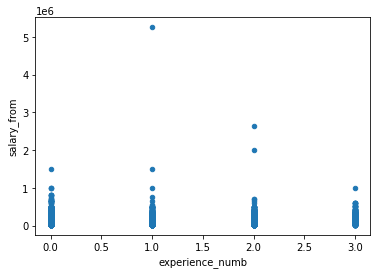

In [65]:
reg_rol_new.plot('experience_numb','salary_from', kind="scatter")

In [66]:
scipy.stats.spearmanr(reg_rol_new.salary_from, reg_rol_new.experience_numb)

SpearmanrResult(correlation=0.35552058865473873, pvalue=0.0)

В рамках критерия ранговой корреляции Спирмена, коррелируются факторы зарплаты и стажа работы. С этой целью, всем факторам стажа работы, присваивается ранг от 0 до 3. Таким образом, получается: у фактора - "Нет опыта" - ранг 0, у фактора "От 1 года до 3 лет" - ранг 1, "От 3 до 6 лет" - ранг 2. И соответственно, у фактора "Более 6 лет" - ранг 3. 
В DataSet, создаётся соответствующая колонка с описанными выше рангами. Затем, она сопоставляется со столбцом зарплаты. Результатом является значение, в нашем случае: 0.3555. Таким образом, констатируем тот факт, что связь прямая и слабая. Коэффициент P-value оценки достоверности критерия Спирмена(pvalue) составил 0.0 . И в данном случае, этот фактор говорит нам о том, что коэффициент корреляции Спирмена для двух указанных признаков, является достоверным.

* Гипотеза 1:

Чем больше вакансий в регионе, тем выше средний уровень зарплаты в регионе.

Структурированные данные для проверки гипотезы 1: 
- Столбец "Регион" и столбец "Начальная зарплата" (reg_rol_new['region'] и reg_rol_new['salary_from']).

Тип данных: 
- Числовые данные (начальная зарплата) ; 
- Категориальные данные (регион) ; 
После преобразования: 
- Числовые данные (средняя зарплата по региону) ;
- Числовые данные (количество вакансий по региону) ;

Выбранный метод анализа: коэффициент корреляции Спирмена
(Источник информации здесь ---> https://www.codecamp.ru/blog/spearman-correlation-python )

Порядок применения метода анализа, заключается в следующем:
Столбцы, "Регион" и "Начальная зарплата", группируются по среднему значению зарплаты. С целью того, чтобы создать список средних зарплат по каждому региону.

In [67]:
salary_reg_rol_mean = reg_rol_new.groupby('region')['salary_from'].mean().apply(int)
salary_reg_rol_mean

region
Алтайский край           50949
Амурская область         48978
Архангельская область    49606
Астраханская область     43436
Белгородская область     55475
                         ...  
Челябинская область      60324
Чеченская республика     42263
Чувашская Республика     44522
Ямало-Ненецкий АО        60034
Ярославская область      61611
Name: salary_from, Length: 82, dtype: int64

После приведённых выше исчислений, создаём отдельный DataSet с двумя Столбцами. 
- В одном столбце указываем, перечень средних зарплат по регионам ;
- В другом столбце указываем, количество вакансий по регионам. 
Как видно из вывода DataSet, в нём имеется 82 записи.

In [68]:
hpr = pd.DataFrame()
hpr['region_vac_count'] = region_vac_count
hpr['salary_reg_rol_mean'] = salary_reg_rol_mean
hpr

,region_vac_count,salary_reg_rol_mean
Москва,6610,109774
Санкт-Петербург,3261,92993
Краснодарский край,2253,124118
Московская область,1492,74291
Свердловская область,1309,70449
...,...,...
Карачаево-Черкесская Республика,10,29300
Еврейская АО,6,40833
Республика Тыва,5,27400
Республика Ингушетия,5,24200


Далее оба столбца проверяются на нормальность с помощью теста Шапиро-Уилка.

In [69]:
scipy.stats.shapiro(hpr['salary_reg_rol_mean'])

ShapiroResult(statistic=0.8868588209152222, pvalue=2.7870055419043638e-06)

In [70]:
scipy.stats.shapiro(hpr['region_vac_count'])

ShapiroResult(statistic=0.4273536801338196, pvalue=2.747800027183572e-16)

У обеих столбцов, коэффициент p-value, достаточно мал. Что в свою очередь, говорит о том, что обе выборки распределены ненормально. Далее необходимо проверить независимость обеих воборок. И поскольку они распределены ненормально, необходимо использовать тест Левена. (Источник здесь ---> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html )

In [71]:
from scipy.stats import levene

stat, p = levene(hpr['salary_reg_rol_mean'], hpr['region_vac_count'])
p

3.003311357330946e-14

Коэффициент P-value, из теста Левена для столбцов, демонстрирует очень маленькое значение, из чего можно сделать вывод, что выборки независимые. 
Таким образом, построить корреляцию двух числовых факторов, независимых и распределённых ненормально, можно с помощью критерия корреляции Спирмена.

In [72]:
scipy.stats.spearmanr(hpr['region_vac_count'], hpr['salary_reg_rol_mean'])

SpearmanrResult(correlation=0.6684044979505204, pvalue=6.824400009353553e-12)

In [73]:
hpr[['region_vac_count', 'salary_reg_rol_mean']].corr(method='spearman')

,region_vac_count,salary_reg_rol_mean
region_vac_count,1.000000,0.668404
salary_reg_rol_mean,0.668404,1.000000


Таким образом, коэффициент корреляции составил 0.66, что говорит о устойчивой прямой корреляции. Коэффициент p-value составил 3.0033 в -14 степени. Что существенно меньше 0.66, а значит, выборки коррелируют с высокой достоверностью.

Отображаем Визуализацию:

<Figure size 1584x720 with 0 Axes>

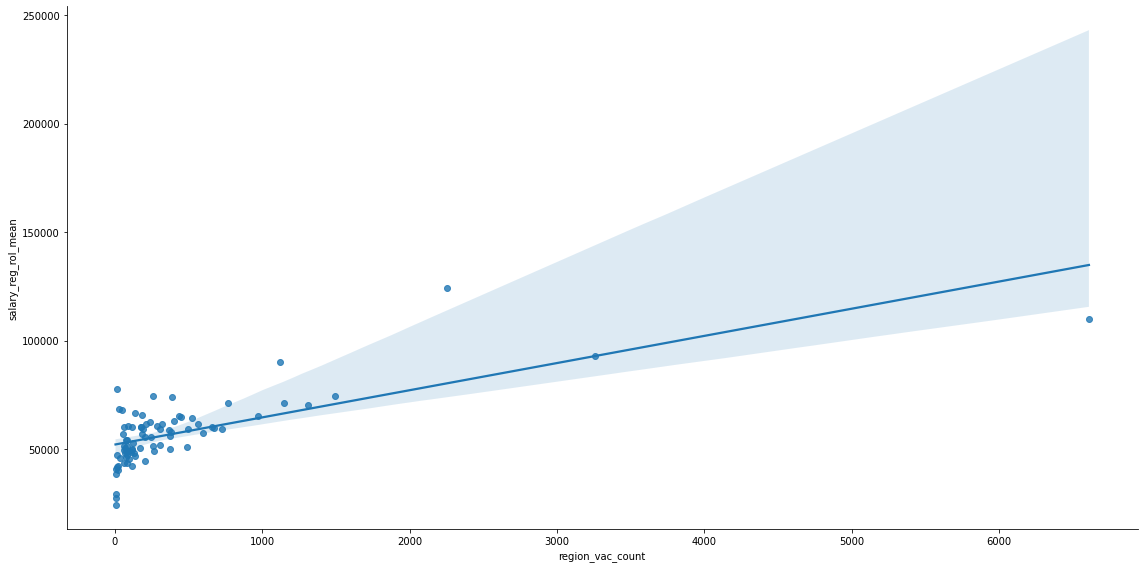

In [74]:
plt.figure(figsize=(22, 10))
sns.lmplot(x='region_vac_count', y='salary_reg_rol_mean', data=hpr, height=8, aspect=2)

На графике рассеяния, мы видим, что заметна тенденция распределения от нижнего левого до правого верхнего угла. Это в свою очередь говорит о том, что имеется прямая корреляция.
В месте с тем, на графике представлена аппроксимирующая прямая линейной зависимости, на примере которой можно установить, что распределение лучше описывается не линейной функцией, а функцией, приближённой к логарифмической.

Результат реализации выбранного метода. 
1. Метод выбран с помощью создания двух выборок. Из расчёта одна выборка на один фактор проверки на их нормальность и независимость. 
2. С помощью выбранного метода видна выраженная и достоверная, прямая корреляция между выбранными факторами. 
3. График распределения, так же продемонстрировал соответствующую тенденцию.

На основании этого, делаем Вывод.

 - Вывод: гипотеза правдоподобна.

Дополнительно еще раз фиксируем следующие факторы:

Выводы Статистического исследования(анализа) показали, что:

1. По критерию Краскала-Уолиса обнаружена выраженная связь между факторами рабочего опыта и минимальной зарплаты;

2. По анализу таблиц сопряжённости для факторов опыта работы и региона на выборке 14-ти регионов по числу вакансий был обнаружен сбивчивый параллелизм роста(то есть параллелизм – это возникновение двух или более событий одновременно. Параллелизм – это естественное явление, потому что многие события происходят одновременно в любой момент времени) и убывания общего числа вакансий по региону и числа вакансий у каждой отдельной категории опыта по региону. 
При этом, наиболее устойчивую и выраженную тенденцию продемонстрировала категория опыта "От 1 года до 3 лет", которая в 13 из 14 регионов была крупнейшей представленной категорией, а её кол-во вакансий росло/убывало параллельно росту/убыванию общего числа вакансий по региону в 12 случаях из 14.

3. Корреляционный анализ по критерию V Крамера между факторами рабочего графика и опыта работы на основе таблицы сопряжённости между этими двумя факторами показал достаточно устойчивый характер корреляции (0,577). Корреляционный анализ Спирмена для факторов минимальной зарплаты и рабочего опыта, последний из которых был закодирован числами от 0 до 3 для каждой из представленных четырёх категорий, показал устойчивый характер корреляции (0,6684).

4) Сформулированная гипотеза о том, что средняя минимальная зарплата в регионе состоит в прямой зависимости с числом вакансий по региону, была проверена с помощью коэффициента корреляции Спирмена на выборках средней зарплаты по региону и количества вакансий по региону. Обе являются числовыми. Коэффициент составил более 0,66 (прямая и умеренная связь), p-value коэффициента равен 3.0033 в -14 степени, что говорит о высокой достоверности коэффициента. Таким образом, гипотеза была признана правдоподобной.

In [79]:
reg_rol_new.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat.csv')

In [80]:
reg_rol_flt.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat3.csv')

In [81]:
reg_rol_flt_reg_vc.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat4.csv')

In [82]:
reg_rol_flt_reg.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat5.csv')

In [83]:
reg_rol_fr_vc_sum.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat2.csv')

In [84]:
reg_rol_new.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat6.csv')

In [85]:
salary_reg_rol_mean.to_csv('/content/drive/MyDrive/Colab Notebooks/reg_rol_stat.csv')